欧氏距离: 1834.8705676423065
DTW 距离: 7106.423150924803


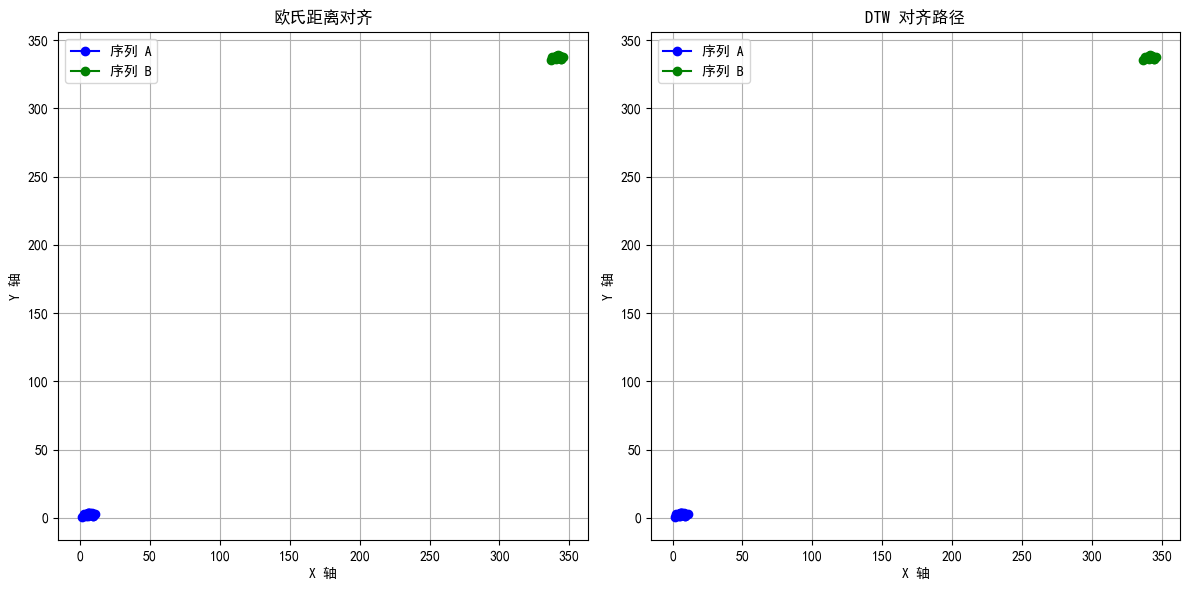

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# 生成随机折线轨迹数据
np.random.seed(0)  # 固定随机数种子，便于复现
A = np.cumsum(np.random.randn(15, 2), axis=0)  # 序列 A：随机折线
# B是对A做线性变换
# B = A + np.random.randn(15, 2) * 0.1  # 序列 B：随机折线 + 噪声
B = A + np.random.randint(1000)  # 序列 B：随机折线 + 噪声

# 计算欧氏距离（假设对齐点的数量一致）
euclidean_distance = np.sqrt(np.sum((A - B[:15]) ** 2))
print("欧氏距离:", euclidean_distance)

# 计算 DTW 距离和路径
dtw_distance, path = fastdtw(A, B, dist=euclidean)
print("DTW 距离:", dtw_distance)

# 可视化
plt.figure(figsize=(12, 6))

# 欧氏距离可视化
plt.subplot(1, 2, 1)
plt.plot(A[:, 0], A[:, 1], 'bo-', label="序列 A")
plt.plot(B[:15, 0], B[:15, 1], 'go-', label="序列 B")

# 欧氏距离连接线
# for i in range(len(A)):
    
#     plt.plot([A[i, 0], B[i, 0]], [A[i, 1], B[i, 1]], 'k--')
    
plt.title("欧氏距离对齐")
plt.xlabel("X 轴")
plt.ylabel("Y 轴")
plt.legend()
plt.grid()

# DTW 距离可视化
plt.subplot(1, 2, 2)
plt.plot(A[:, 0], A[:, 1], 'bo-', label="序列 A")
plt.plot(B[:, 0], B[:, 1], 'go-', label="序列 B")

# DTW 对齐路径
# for (i, j) in path:
#     plt.plot([A[i, 0], B[j, 0]], [A[i, 1], B[j, 1]], 'k--')

plt.title("DTW 对齐路径")
plt.xlabel("X 轴")
plt.ylabel("Y 轴")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
